In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import numpy as np
import seaborn as sns
from matplotlib import cycler

plt.style.use('fivethirtyeight')

colors = ['#16b713','#1A8FE3','#38369A','#9810B3','#D11149','#FF6201','#f3ba07']
plt.rc('axes',prop_cycle=cycler('color',colors))

In [27]:
df = pd.read_csv('../data/cleaned.csv')

/var/folders/gm/phwm98352tj19cnh_y_nt3n80000gn/T/ipykernel_48963/997357530.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans['cluster'] = labels


Cluster 0
Mean word score results: 1.519958661426655
Mean average number of guesses: 4.400422535211268
Mean word occuraence: 0.011870936251211297


Cluster 1
Mean word score results: 1.4625241806325615
Mean average number of guesses: 4.096208791208791
Mean word occuraence: 0.018401218899472063


Cluster 2
Mean word score results: 1.244393921111626
Mean average number of guesses: 4.2180188679245285
Mean word occuraence: 0.009645000458236725




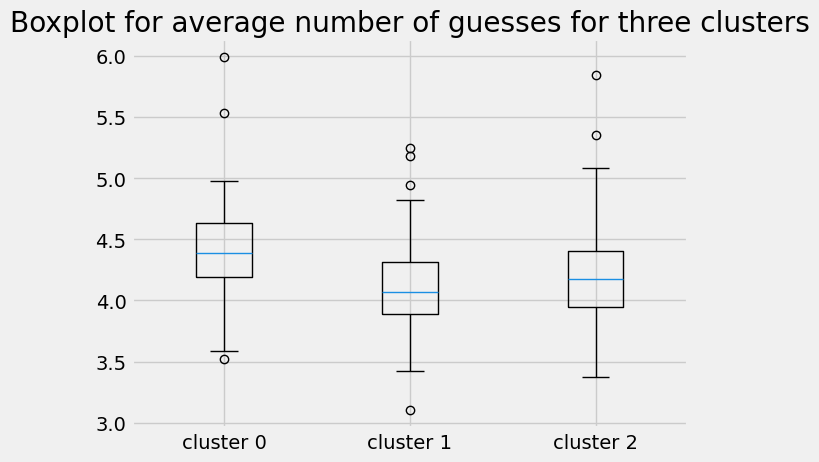

In [28]:
df_kmeans = df[['word_score', 'avg_num_guesses', 'word_occurrence','vowels','repeats']]
# word_score,avg_num_guesses,word_occurrence
kmeans = KMeans(n_clusters=3,n_init=10).fit(df_kmeans)

# Predict the cluster labels for each data point
labels = kmeans.predict(df_kmeans)

# Add the cluster labels to the data
df_kmeans['cluster'] = labels

# Print the summary statistics for each cluster
for i in range(3):
    cluster_data = df_kmeans[df_kmeans['cluster'] == i]
    print('Cluster', i)
    print('Mean word score results:',
          cluster_data['word_score'].mean())
    print('Mean average number of guesses:',
          cluster_data['avg_num_guesses'].mean())
    print('Mean word occuraence:', 
          cluster_data['word_occurrence'].mean())
    print('\n')

boxplot_df = [df_kmeans[df_kmeans.cluster == 0].avg_num_guesses,
              df_kmeans[df_kmeans.cluster == 1].avg_num_guesses,
              df_kmeans[df_kmeans.cluster == 2].avg_num_guesses]

plt.boxplot(boxplot_df)
plt.title('Boxplot for average number of guesses for three clusters')
plt.xticks(range(1,4),labels=[f'cluster {str(i)}' for i in range(3)])
plt.show()

Cluster 0
Mean word score results: 1.348062712279306
Mean average number of guesses: 4.156647727272727
Mean word occuraence: 0.012115481664328671


Cluster 1
Mean word score results: 1.3261015574798811
Mean average number of guesses: 4.72875
Mean word occuraence: 0.005450028919988113


Cluster 2
Mean word score results: 1.6004868111038284
Mean average number of guesses: 3.7615789473684225
Mean word occuraence: 0.02739264257086536




/var/folders/gm/phwm98352tj19cnh_y_nt3n80000gn/T/ipykernel_48963/565368856.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans['cluster'] = labels


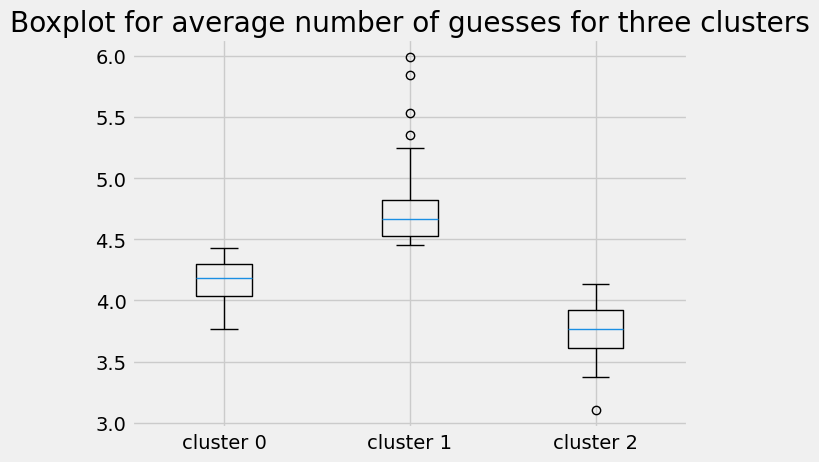

In [29]:
from sklearn.cluster import KMeans
import matplotlib.dates as dates
df_kmeans = df[['word_score', 'avg_num_guesses', 'word_occurrence']]
# word_score,avg_num_guesses,word_occurrence
kmeans = KMeans(n_clusters=3,n_init=10).fit(df_kmeans)

# Predict the cluster labels for each data point
labels = kmeans.predict(df_kmeans)

# Add the cluster labels to the data
df_kmeans['cluster'] = labels

# Print the summary statistics for each cluster
for i in range(3):
    cluster_data = df_kmeans[df_kmeans['cluster'] == i]
    print('Cluster', i)
    print('Mean word score results:',
          cluster_data['word_score'].mean())
    print('Mean average number of guesses:',
          cluster_data['avg_num_guesses'].mean())
    print('Mean word occuraence:', 
          cluster_data['word_occurrence'].mean())
    print('\n')

boxplot_df = [df_kmeans[df_kmeans.cluster == 0].avg_num_guesses,
              df_kmeans[df_kmeans.cluster == 1].avg_num_guesses,
              df_kmeans[df_kmeans.cluster == 2].avg_num_guesses]

plt.boxplot(boxplot_df)
plt.xticks(range(1,4),labels=[f'cluster {str(i)}' for i in range(3)])
plt.title('Boxplot for average number of guesses for three clusters')
plt.show()

In [30]:
difficulty = {2:'easy',0:'medium',1:'hard'}
df['difficulty'] = labels
df['difficulty'] = df.difficulty.apply(lambda x: difficulty[x])

In [31]:
df

,date,contest_num,word,num_results,num_hardmode,in1,in2,in3,in4,in5,...,letter3_int,letter4_int,letter5_int,avg_num_guesses,day_of_week,word_score,word_occurrence,vowels,repeats,difficulty
0,2022-01-07,202,slump,80630,1362,1,3,23,39,24,...,21,13,16,4.13,4,1.270683,0.000419,1,0,medium
1,2022-01-08,203,crank,101503,1763,1,5,23,31,24,...,1,14,11,4.22,5,1.300505,0.001037,1,0,medium
2,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,...,18,7,5,4.64,6,1.421003,0.001064,2,1,hard
3,2022-01-10,205,query,107134,2242,1,4,16,30,30,...,5,18,25,4.43,0,1.187546,0.003178,2,0,medium
4,2022-01-11,206,drink,153880,3017,1,9,35,34,16,...,9,14,11,3.77,1,1.148502,0.014598,1,0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879,2012,0,2,17,35,29,...,14,4,15,4.45,1,1.271154,0.000276,2,1,hard
355,2022-12-28,557,impel,20160,1937,0,3,21,40,25,...,16,5,12,4.15,2,1.377718,0.000204,2,0,medium
356,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,...,22,15,3,4.40,3,1.169976,0.000796,2,0,medium
357,2022-12-30,559,molar,21204,1973,0,4,21,38,26,...,12,1,18,4.14,4,1.564995,0.001400,2,0,medium


In [32]:
df.columns

Index(['date', 'contest_num', 'word', 'num_results', 'num_hardmode', 'in1',
       'in2', 'in3', 'in4', 'in5', 'in6', 'over6', 'letter1', 'letter2',
       'letter3', 'letter4', 'letter5', 'letter1_int', 'letter2_int',
       'letter3_int', 'letter4_int', 'letter5_int', 'avg_num_guesses',
       'day_of_week', 'word_score', 'word_occurrence', 'vowels', 'repeats',
       'difficulty'],
      dtype='object')

In [46]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

X = df[['word_score','word_occurrence','vowels','repeats']]
y = df['difficulty']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

preds = clf.predict(X_test)